# Facetting

- `facet_null()`: a single plot, the default
- `facet_wrap()`: "wraps" a 1d ribbon of panels into 2d
- `facet_grid()`: produces a 2d grid of panels defined by variables which form the rows and columns

![](./assets/position-facets.png)

In [2]:
library(ggplot2)
library(repr)
options(repr.plot.width=3, repr.plot.height=2, repr.plot.res=180)
options(warn=-1)

# multiplot function from Cookbook for R by Winston Chang
# modified by Yuanxing Cheng
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, ncol=1, layout=NULL, res=180, width=0) {
    library(grid)

    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)

    numPlots = length(plots)
    if (width>0){
        options(repr.plot.width=width, repr.plot.height=2*max(ceiling(numPlots/ncol),1), repr.plot.res=res)
    } else{
        options(repr.plot.width=min(9,3*ncol), repr.plot.height=2*max(ceiling(numPlots/ncol),1), repr.plot.res=res)   
    }

    # If layout is NULL, then use 'ncol' to determine layout
    if (is.null(layout)) {
        # Make the panel
        # ncol: Number of columns of plots
        # nrow: Number of rows needed, calculated from # of column
        layout <- matrix(
            seq(1, ncol * ceiling(numPlots/ncol)),
            ncol = ncol, nrow = ceiling(numPlots/ncol),
            byrow=TRUE # set byrow=TRUE will make the subplots listed by row
        )
    }

    if (numPlots==1) {
        print(plots[[1]])
    } else {
        # Set up the page
        grid.newpage()
        pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

        # Make each plot, in the correct location
        for (i in 1:numPlots) {
            # Get the i,j matrix positions of the regions that contain this subplot
            matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
            print(
                plots[[i]],
                vp = viewport(
                    layout.pos.row = matchidx$row,
                    layout.pos.col = matchidx$col
                )
            )
        }
    }
}
myTheme = theme(
    plot.title = element_text(size = rel(0.5)), 
    axis.title = element_text(size = rel(0.8)), 
    legend.title = element_text(size = rel(0.8)),
    legend.key.size = unit(2.2,'mm')
)

mpg2 <- subset(mpg, cyl != 5 & drv %in% c("4", "f") & class != "2seater")

## Facet wrap

for `facet_wrap()`, the arguments are

- `ncol` or `nrow`, set only one of the two
- `as.table`, `TRUE` then highest values at the bottom-right
- `dir`, direction, `h` or `v` for horizontal or vertical

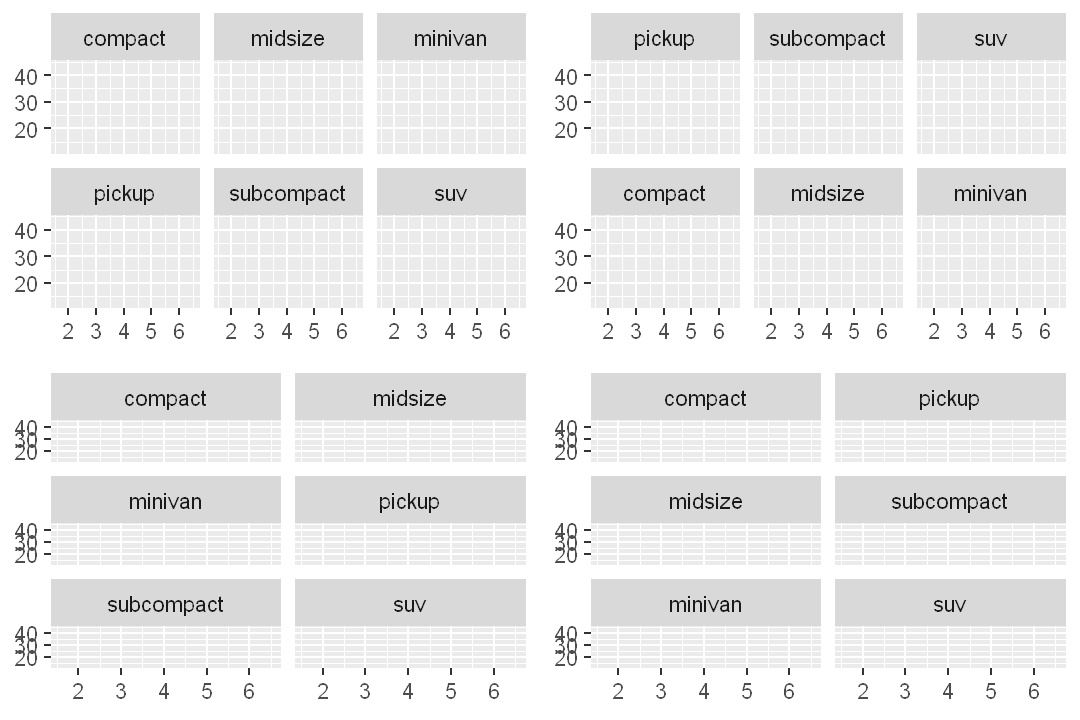

In [7]:
base <- ggplot(mpg2, aes(displ, hwy)) + 
geom_blank() + 
xlab(NULL) + 
ylab(NULL) + myTheme

base1 <- base + facet_wrap(~class, ncol = 3)
base2 <- base + facet_wrap(~class, ncol = 3, as.table = FALSE)

base3 <- base + facet_wrap(~class, nrow = 3)
base4 <- base + facet_wrap(~class, nrow = 3, dir = "v")

multiplot(base1,base2,base3,base4,ncol = 2)

## Facet grid

`facet_grid()` lays out plots in a 2d grid

- `. ~ colName` spreads the values of `colName` across the columns
- `colName ~.` spreads the values of `colName` down the rows
- `colName1 ~ colName2` spreads `colName1` across columns and `colName2` down rows

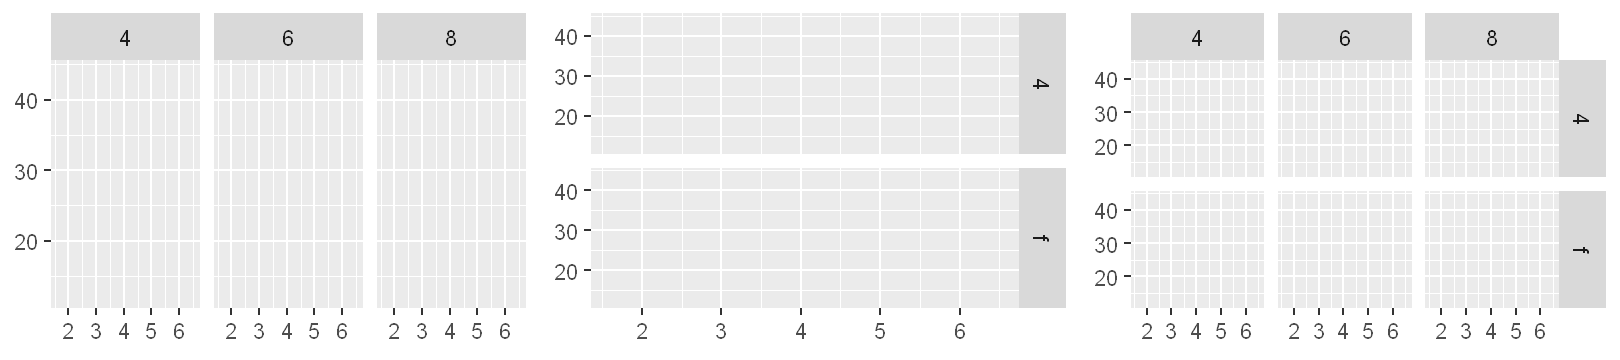

In [9]:
p1 <- base + facet_grid(. ~ cyl)
p2 <- base + facet_grid(drv ~ .)
p3 <- base + facet_grid(drv ~ cyl)
multiplot(p1,p2,p3,ncol = 3)

## Controlling scales

For `facet_wrap()` and `facet_grid()`, add arguments:

- `scales = "fixed"`: x and y scales are fixed across all panels.
- `scales = "free_x"`: the x scale is free, and the y scale is fixed.
- `scales = "free_y"`: the y scale is free, and the x scale is fixed.
- `scales = "free"`: x and y scales vary across panels.


- fixed scales: see patterns across panels
- free scales: to see patterns within panels. Or in time series data

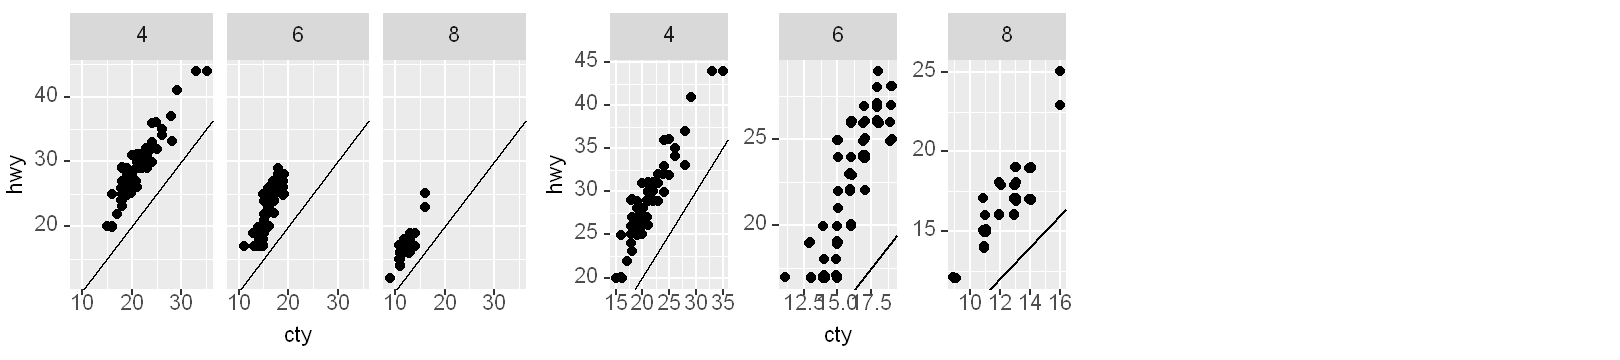

In [13]:
p <- ggplot(mpg2, aes(cty, hwy)) + 
geom_abline() +
geom_jitter(width = 0.1, height = 0.1) +myTheme
p1 <- p + facet_wrap(~cyl)
p2 <- p + facet_wrap(~cyl, scales = "free")
multiplot(p1,p2,ncol=3)

date,variable,value,value01
1967-07-01,pce,507.4,0.0000000000
1967-08-01,pce,510.5,0.0002660008
1967-09-01,pce,516.3,0.0007636797
1967-10-01,pce,512.9,0.0004719369
1967-11-01,pce,518.1,0.0009181318
1967-12-01,pce,525.8,0.0015788435


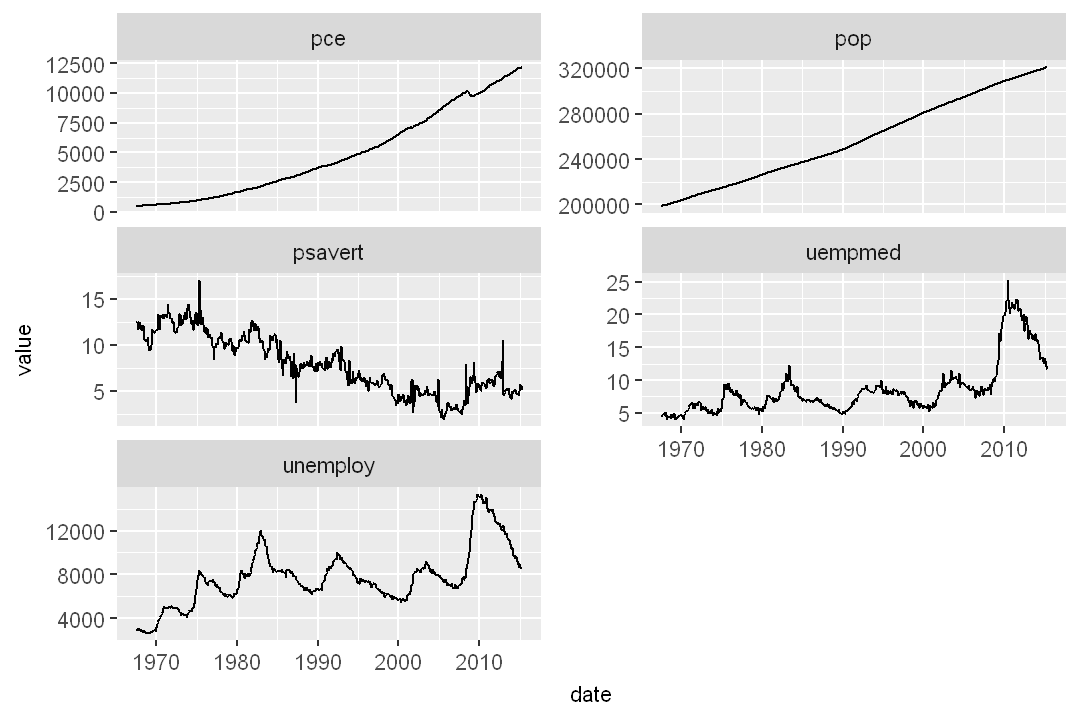

In [19]:
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res=180)
head(economics_long)
ggplot(economics_long, aes(date, value)) + 
geom_line() + 
facet_wrap(~variable, scales = "free_y", ncol = 2) + myTheme

In `facet_grid()` you can set `space="free"` so that the scaling equal across the whole plot.

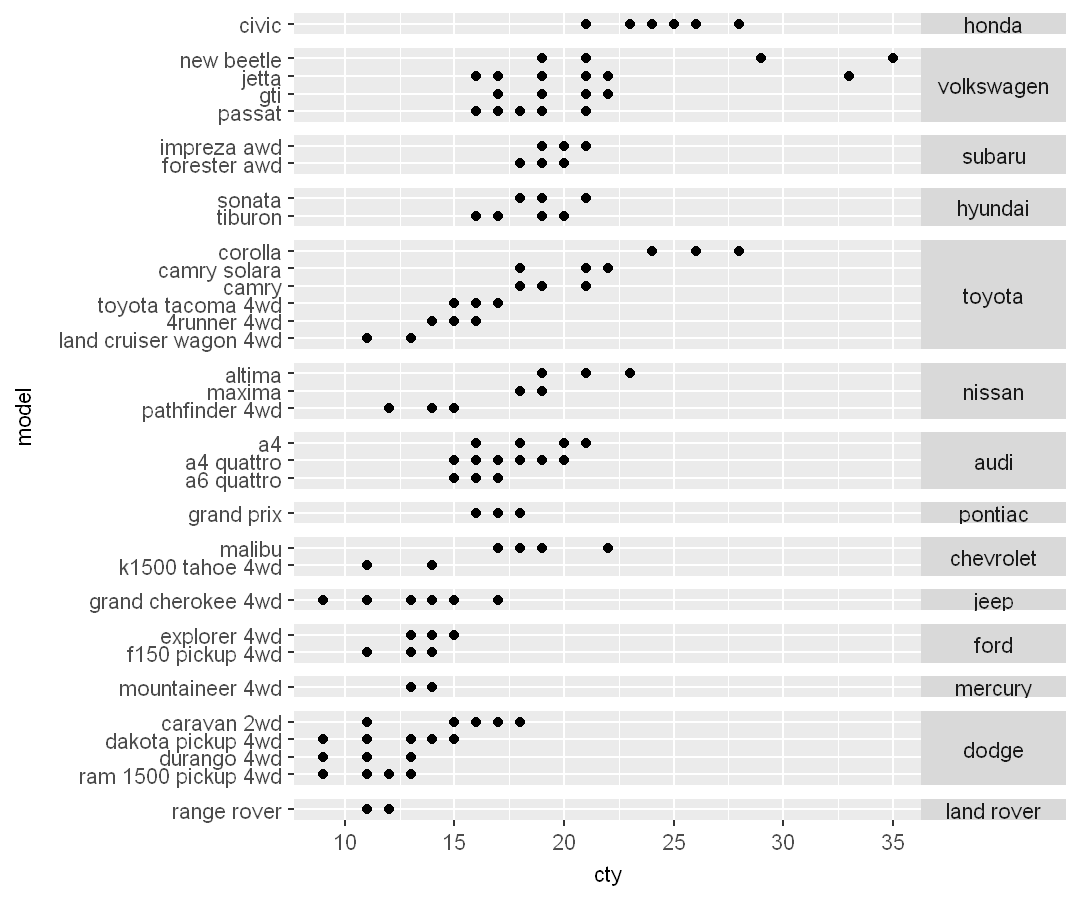

In [21]:
options(repr.plot.width=6, repr.plot.height=5, repr.plot.res=180)
mpg2$model <- reorder(mpg2$model, mpg2$cty)
mpg2$manufacturer <- reorder(mpg2$manufacturer, -mpg2$cty)
ggplot(mpg2, aes(cty, model)) + 
geom_point() + 
facet_grid(manufacturer ~ ., scales = "free", space = "free") +
theme(strip.text.y = element_text(angle = 0))+myTheme

## Missing facetting variables

missing facetting variables are treated like they have all values cross each layer. Focus on the red dot bellow

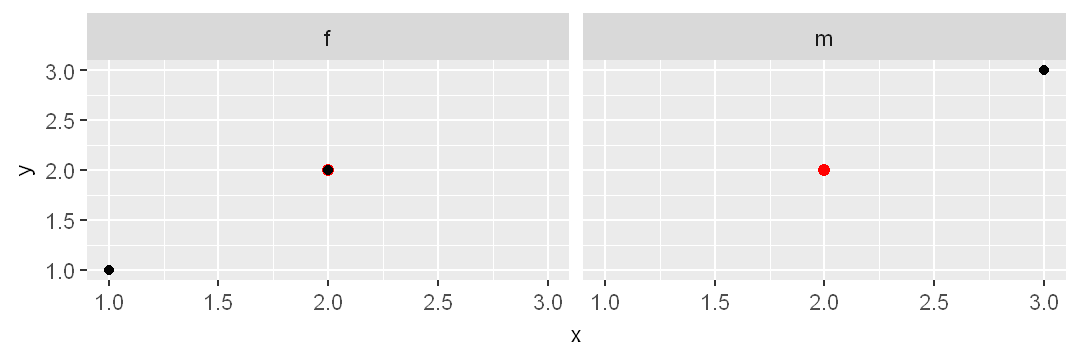

In [24]:
df1 <- data.frame(x = 1:3, y = 1:3, gender = c("f", "f", "m"))
df2 <- data.frame(x = 2, y = 2)
options(repr.plot.width=6, repr.plot.height=2, repr.plot.res=180)
ggplot(df1, aes(x, y)) + 
geom_point(data = df2, colour = "red", size = 2) + 
geom_point() + 
facet_wrap(~gender) + myTheme

## Grouping vs. facetting

## Continuous variables

To facet continuous variables, you must first discretise them

- Divide the data into n bins each of the same length: `cut_interval(x, n)`
- Divide the data into bins of width width: `cut_width(x, width)`
- Divide the data into n bins each containing (approximately) the same number of points: `cut_number(x, n = 10)`

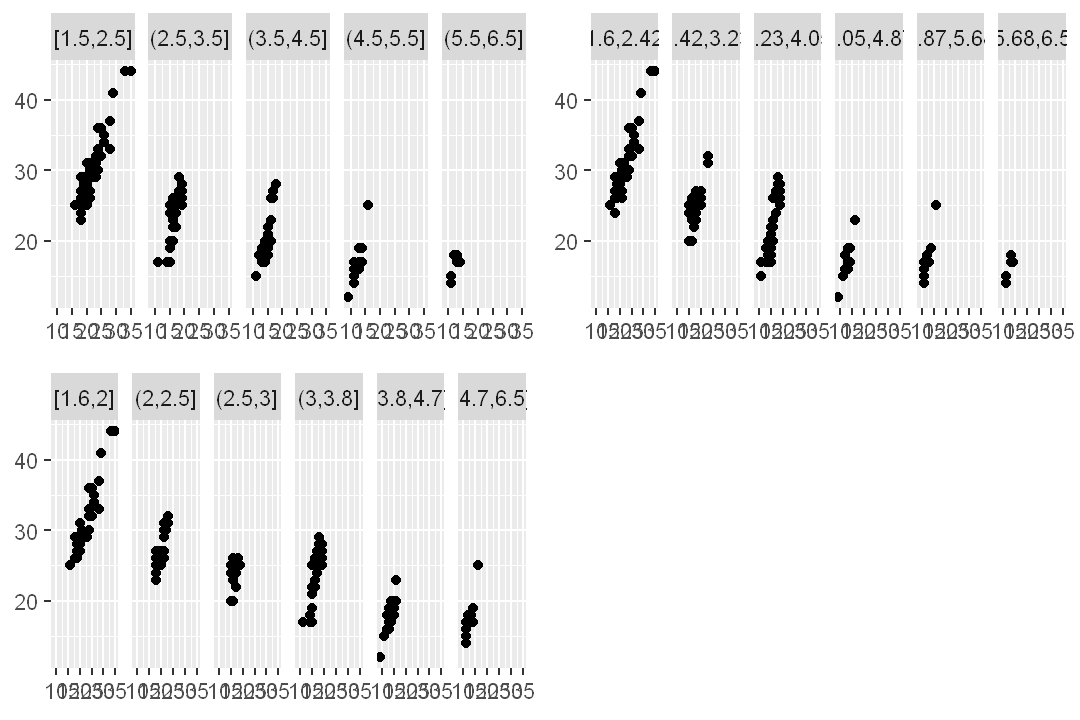

In [34]:
# Bins of width 1
mpg2$disp_w <- cut_width(mpg2$displ, 1)
# Six bins of equal length
mpg2$disp_i <- cut_interval(mpg2$displ, 6)
# Six bins containing equal numbers of points
mpg2$disp_n <- cut_number(mpg2$displ, 6)

plot <- ggplot(mpg2, aes(cty, hwy)) +
geom_point() +
labs(x = NULL, y = NULL) + myTheme
p1 <- plot + facet_wrap(~disp_w, nrow = 1)
p2 <- plot + facet_wrap(~disp_i, nrow = 1)
p3 <- plot + facet_wrap(~disp_n, nrow = 1)
multiplot(p1,p2,p3,ncol=2)

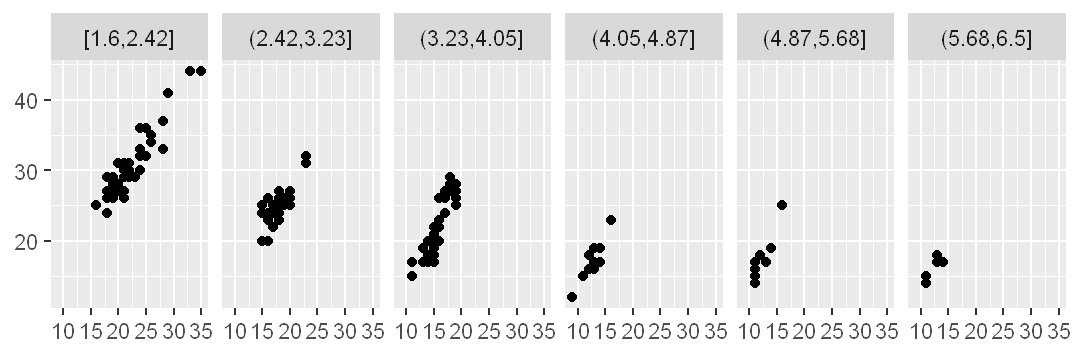